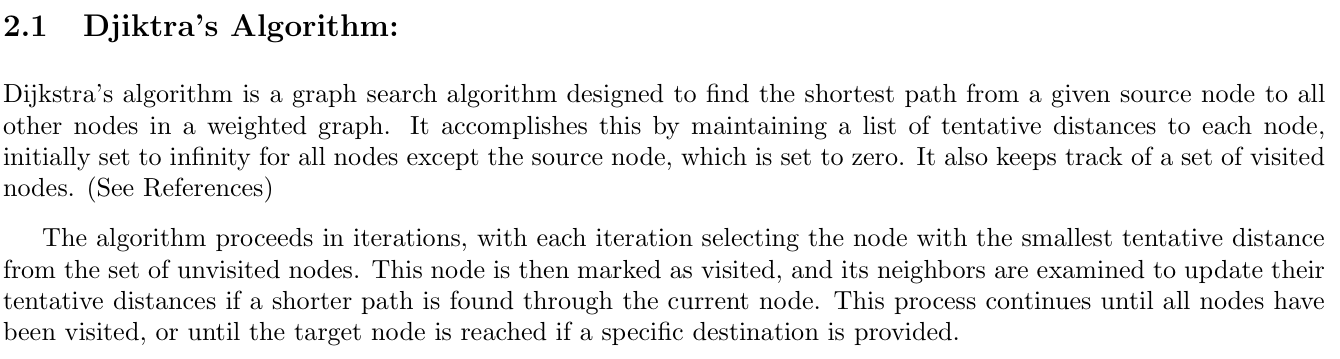

In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 Given below is one implementation of the algorithm where we define a function with two arguments- the input
 graph (as an adjacency matrix) and a source city.

In [5]:
def dijkstra (graph , source):
  # Number of vertices in the graph
  vertices = len(graph)
  # Initialize a list of distances from source to all other vertices as large number
  dist = [sys.maxsize]*vertices
  # Initialize distance of source vertex from itself as 0
  dist[source]= 0
  # Initialize list to keep track of visited vertices
  visited = [False]*vertices

  # Loop to find shortest path for all vertices
  for _ in range(vertices):

    # Find the vertex with the minimum distance value,which has not been visited yet
    min_dist = sys.maxsize
    min_dist_index = 0
    for v in range(vertices):
      if dist[v] < min_dist and not visited[v]:
        min_dist = dist[v]
        min_dist_index = v

    # Mark the minimum distance vertex as visited
    visited[min_dist_index] = True

    # Update the distance value of the adjacent vertices of the picked vertex
    for v in range(vertices):
      if (graph[min_dist_index][v] > 0) and ( not visited[v] ) and ( dist[v] > dist[min_dist_index] + graph[min_dist_index][v] ):
        dist[v] = dist[min_dist_index] + graph[min_dist_index][v]

  return dist

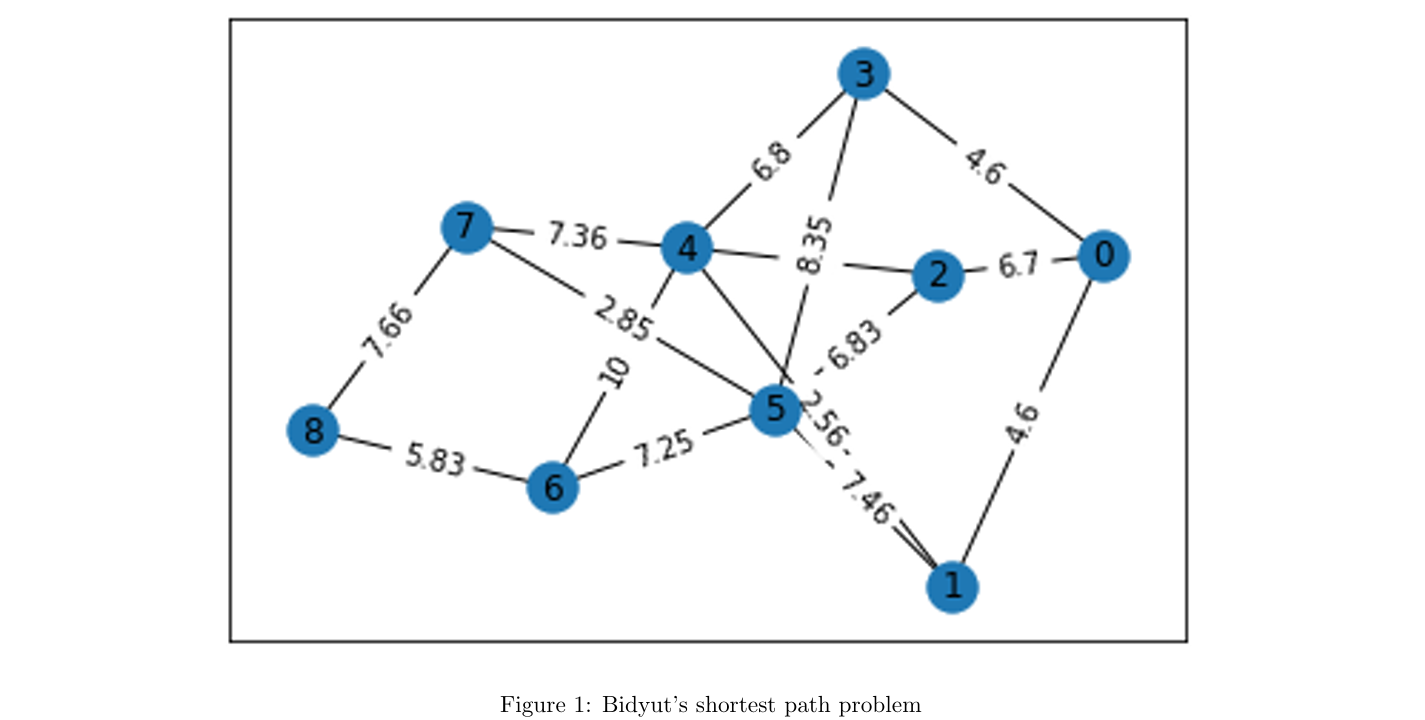

In [6]:
#defining adjacency matrix from above graph, where is nodes are not connected then the value is zero, otherwise whatever value is given is taken
graph = [[0, 4.6 ,6.7 ,4.6 ,0 ,0 ,0 ,0 ,0],
          [4.6 ,0 ,0 ,0 ,2.56, 7.46, 0, 0, 0],
           [6.7, 0, 0, 0, 8.35, 6.83, 0, 0, 0],
            [4.6, 0, 0, 0, 6.8, 8.35, 0, 0, 0],
             [0, 2.56, 8.35, 6.8, 0, 0, 10, 7.36, 0],
              [0, 7.46, 6.83, 8.35, 0, 0, 7.25, 2.85, 0],
               [0, 0, 0, 0, 10, 7.25, 0, 0, 5.83],
                [0, 0, 0, 0, 7.36, 2.85, 0, 0, 7.66],
                 [0, 0, 0, 0, 0, 0, 5.83, 7.66, 0]]

#checking for validation:
for i in range(len(graph)):
  for j in range(len(graph)):
    if graph[i][j] != graph[j][i]:
      print("Error")

 Bidyut is an aspiring actor from Guwahati who wants to go to Mumbai in search of fame and fortune. He wants
 to travel on his motorcycle, and that’s a long journey. Riding for day 1 he can reach his friend in Siliguri (0).
 Now he faces a problem. After spending the night in Siliguri, he can choose to go to either his friend in Patna (1),
 Jamshedpur (2), or Kolkata (3) to spend the second night. Then from there, he can spend his third night in his
 friend’s home at either Varanasi (4) or Raipur (5). Similarly fourth night he can spend in Indore (6) or Nagpur (7)
 and then finally from there he can reach Mumbai (8). He prepares the following graph with distances as edge weights
 (in × 100 km). (Distance from Jamshedpur (2) to Varanasi (4) is 5.4 × 100 km)

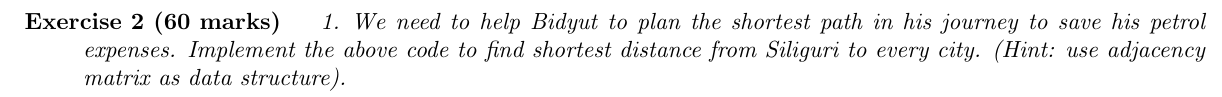

In [7]:
dist = dijkstra(graph , 0)

In [8]:
dist

[0, 4.6, 6.7, 4.6, 7.16, 12.059999999999999, 17.16, 14.52, 22.18]

This shows us shortest distances from siliguri to every other city

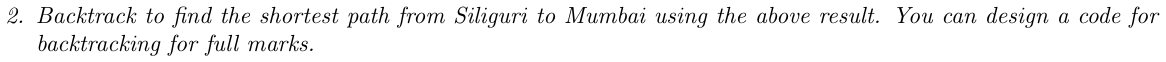

In [9]:
# to find the backtracked path, we just need to add a previous node list in the algorithm

def dijkstra(graph, source, target):
    # Number of vertices in the graph
    vertices = len(graph)

    # Initialize a list of distances from source to all other vertices as large number
    dist = [sys.maxsize] * vertices

    # Initialize distance of source vertex from itself as 0
    dist[source] = 0

    # Initialize list to keep track of visited vertices
    visited = [False] * vertices

    # Initialize list to keep track of prevnodes
    prevnode = [-1] * vertices

    for _ in range(vertices):
        # Find the vertex with the minimum distance value, which has not been visited yet
        min_dist = sys.maxsize
        min_dist_index = 0
        for v in range(vertices):
            if dist[v] < min_dist and not visited[v]:
                min_dist = dist[v]
                min_dist_index = v

        # Mark the minimum distance vertex as visited
        visited[min_dist_index] = True

        # Update the distance value of the adjacent vertices of the picked vertex
        for v in range(vertices):
            if graph[min_dist_index][v] > 0 and not visited[v] and dist[v] > dist[min_dist_index] + graph[min_dist_index][v]:
                dist[v] = dist[min_dist_index] + graph[min_dist_index][v]
                prevnode[v] = min_dist_index

    # Backtrack to find the path and distance between source and target
    path = []
    current = target
    while current != -1:
        path.insert(0, current)
        current = prevnode[current]

    return dist[target], path

In [10]:
dist, path = dijkstra(graph, 0, 8)

In [13]:
print("Shortest Distance is: ", dist)

Shortest Distance is:  22.18


In [11]:
path

[0, 1, 4, 7, 8]

Which shows that the path from siliguri to mumbai follows: 0, 1, 4, 7, 8 meaning: Siliguri -> Patna -> Varanasi -> Nagpur -> Mumbai

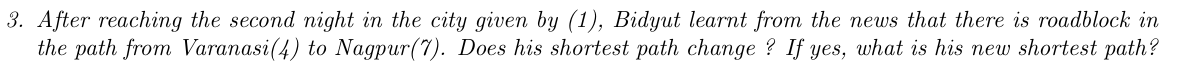

since this has happened after reaching city (1) [ meaning Patna ], what we can do here is now update the graph and find shortest distance from (1) to (8). But this time there will not be nodes (0) [Siliguri] (2) [Jamshedpur] (3) [Kolkata]

So we will just mark all the distances from 0, 2, 3 to 0. Also since path from (4) to (7) is blocked we also change that distance to 0.

In [14]:
# new graph is after blocking 4 to 7 and 7 to 4
graph = [[0, 0 ,0 ,0 ,0 ,0 ,0 ,0 ,0],
          [0 ,0 ,0 ,0 ,2.56, 7.46, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 2.56, 0, 0, 0, 0, 10, 0, 0],
              [0, 7.46, 0, 0, 0, 0, 7.25, 2.85, 0],
               [0, 0, 0, 0, 10, 7.25, 0, 0, 5.83],
                [0, 0, 0, 0, 0, 2.85, 0, 0, 7.66],
                 [0, 0, 0, 0, 0, 0, 5.83, 7.66, 0]]

#checking for validation:
for i in range(len(graph)):
  for j in range(len(graph)):
    if graph[i][j] != graph[j][i]:
      print("Error")

In [15]:
dist, path = dijkstra(graph, 1, 8)

In [16]:
dist

17.97

In [17]:
path

[1, 5, 7, 8]

The new path does change and is now 1, 5, 7, 8 meaning

Siliguri -> Patna -> Raipur -> Nagpur -> Mumbai

In [18]:
print("New total distance from Silguri to Mumbai is now: ", dist+4.6)

New total distance from Silguri to Mumbai is now:  22.57


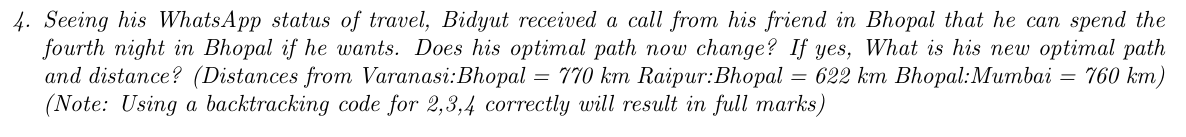

Case 1: In Silguri

In [21]:
# new graph is
# WHILE IN SILIGURI HE IS UNAWARE OF THE NEWS

graph = [[0, 4.6 ,6.7 ,4.6 ,0 ,0 ,0 ,0 ,0, 0],
          [4.6 ,0 ,0 ,0 ,2.56, 7.46, 0, 0, 0, 0],
           [6.7, 0, 0, 0, 8.35, 6.83, 0, 0, 0, 0],
            [4.6, 0, 0, 0, 6.8, 8.35, 0, 0, 0, 0],
             [0, 2.56, 8.35, 6.8, 0, 0, 10, 7.36, 0, 7.7],
              [0, 7.46, 6.83, 8.35, 0, 0, 7.25, 2.85, 0, 6.22],
               [0, 0, 0, 0, 10, 7.25, 0, 0, 5.83, 0],
                [0, 0, 0, 0, 7.36, 2.85, 0, 0, 7.66, 0],
                 [0, 0, 0, 0, 0, 0, 5.83, 7.66, 0, 7.6],
                  [0, 0, 0, 0, 7.7, 6.22, 0, 0, 7.6, 0] ] #this is the added 9th node

#checking for validation:
for i in range(len(graph)):
  for j in range(len(graph)):
    if graph[i][j] != graph[j][i]:
      print("Error")

Since we add a new node for 4th night, we add node no. 9 and add the distances from (9) to (4), (5) and (8)

4 is Varanasi

5 is Raipur

8 is Mumbai

9 Bhopal

In [22]:
dist, path = dijkstra(graph, 0, 8)

In [24]:
print("Distance from Siliguri to Mumbai, if call received in Siliguri: ", dist)

Distance from Siliguri to Mumbai, if call received in Siliguri:  22.18


In [25]:
path

[0, 1, 4, 7, 8]

Path is the same as what we have seen in b) part

Which shows that the path from siliguri to mumbai follows: 0, 1, 4, 7, 8 meaning: Siliguri -> Patna -> Varanasi -> Nagpur -> Mumbai

Case 2 : Before News means blockage is NOT acknowledged

In [28]:
# new graph is
# WHILE IN SILIGURI HE IS UNAWARE OF THE NEWS

graph = [[0, 4.6 ,6.7 ,4.6 ,0 ,0 ,0 ,0 ,0, 0],
          [4.6 ,0 ,0 ,0 ,2.56, 7.46, 0, 0, 0, 0],
           [6.7, 0, 0, 0, 8.35, 6.83, 0, 0, 0, 0],
            [4.6, 0, 0, 0, 6.8, 8.35, 0, 0, 0, 0],
             [0, 2.56, 8.35, 6.8, 0, 0, 10, 7.36, 0, 7.7],
              [0, 7.46, 6.83, 8.35, 0, 0, 7.25, 2.85, 0, 6.22],
               [0, 0, 0, 0, 10, 7.25, 0, 0, 5.83, 0],
                [0, 0, 0, 0, 7.36, 2.85, 0, 0, 7.66, 0],
                 [0, 0, 0, 0, 0, 0, 5.83, 7.66, 0, 7.6],
                  [0, 0, 0, 0, 7.7, 6.22, 0, 0, 7.6, 0] ] #this is the added 9th node

#checking for validation:
for i in range(len(graph)):
  for j in range(len(graph)):
    if graph[i][j] != graph[j][i]:
      print("Error")

In [29]:
dist, path = dijkstra(graph, 1, 8)

In [30]:
print("Distance from Siliguri to Mumbai, if at 1 before news: ", dist+4.6)

Distance from Siliguri to Mumbai, if at 1 before news:  22.18


In [31]:
path

[1, 4, 7, 8]

The Path remains the same from 0 -> 1 -> 4 -> 7 -> 8

Case 3: Road Blocked

In [33]:
# new graph is
# I AM ASSUMING THE EVENTS OF 3RD PART ARE TRUE HERE MEANING, THE ROADBLOCK IS THERE AND HE HAS REACHED (1) IN SECOND NIGHT
graph = [[0, 0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0],
          [0 ,0 ,0 ,0 ,2.56, 7.46, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 2.56, 0, 0, 0, 0, 10, 0, 0, 7.7],
              [0, 7.46, 0, 0, 0, 0, 7.25, 2.85, 0, 6.22],
               [0, 0, 0, 0, 10, 7.25, 0, 0, 5.83, 0],
                [0, 0, 0, 0, 0, 2.85, 0, 0, 7.66, 0],
                 [0, 0, 0, 0, 0, 0, 5.83, 7.66, 0, 7.6],
                  [0, 0, 0, 0, 7.7, 6.22, 0, 0, 7.6, 0]]   #this is the added 9th node

#checking for validation:
for i in range(len(graph)):
  for j in range(len(graph)):
    if graph[i][j] != graph[j][i]:
      print("Error")

In [34]:
dist, path = dijkstra(graph, 1, 8)

In [35]:
print("Distance from Siliguri to Mumbai, if at 1 after news: ", dist+4.6)

Distance from Siliguri to Mumbai, if at 1 after news:  22.46


In [36]:
path

[1, 4, 9, 8]

This is the path from (1) to (8), if we want distance from (0) to (8) we just add the distance 4.6 (of (0) -> (1)) to 17.86, which means total distance bewcomes 17.86+4.6 = 22.46, which is a tad bit more from 2nd part,

the path is (0) -> (1) -> (4) -> (9) -> (8) which is different from 3rd part and the cities are:

Siliguri -> Patna -> Varanasi -> Bhopal -> Mumbai

Yes the path has changed, now he visits his friend in Bhopal